# В этом файле проведу простой "эксперимент" - попробую сгенерировать простую выборку и на ней построю логистическую регрессию и нейронную сеть в 1 слой который будет представлять собой сигмоид функцию.

Для начала, загрузка библиотек.

In [2]:
import numpy as np;
import sklearn.linear_model as sklm;
from tensorflow import keras;
import matplotlib.pyplot as plt;
from tensorflow.keras import layers

## Генерация выборки

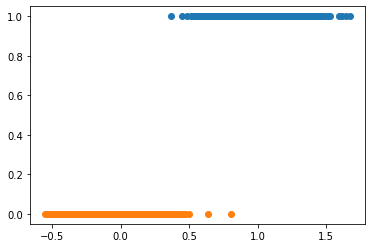

In [3]:
n = 2000;

Y = np.zeros(n)
Y[np.random.rand(n) > 0.5] = 1

X = np.array([np.random.normal(i,0.2,1) for i in Y])

def fast_scatter_plot():
    plt.scatter(X[Y > 0.5],Y[Y > 0.5])
    plt.scatter(X[Y <= 0.5], Y[Y <= 0.5])

fast_scatter_plot()

Идеальная ситуация для логистической регрессии.

## Построение логистической регрессии

In [9]:
model = sklm.LogisticRegression().fit(X,Y)

new_X = np.linspace(-0.6, 1.50, 50).reshape(-1,1)
new_Y = model.predict_proba(np.linspace(-0.3,1.25, 50).reshape(-1,1))[:,1]

постотрим на прогноз сформированый логистической регрессией

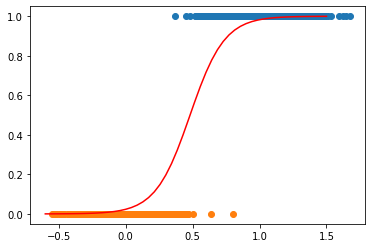

In [10]:
fast_scatter_plot()
plt.plot(new_X, new_Y, color = 'r')

## Построение "нейронной сети"

In [13]:
model = keras.Sequential()
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy')
model.fit(X,Y,  epochs=150, verbose=0)

получим предсказания от этой модели

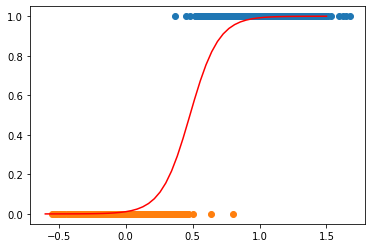

In [14]:
new_Y_nn = model.predict(new_X)

fast_scatter_plot()
plt.plot(new_X, new_Y_nn, color = 'r')

## Графическое сравнение результатов

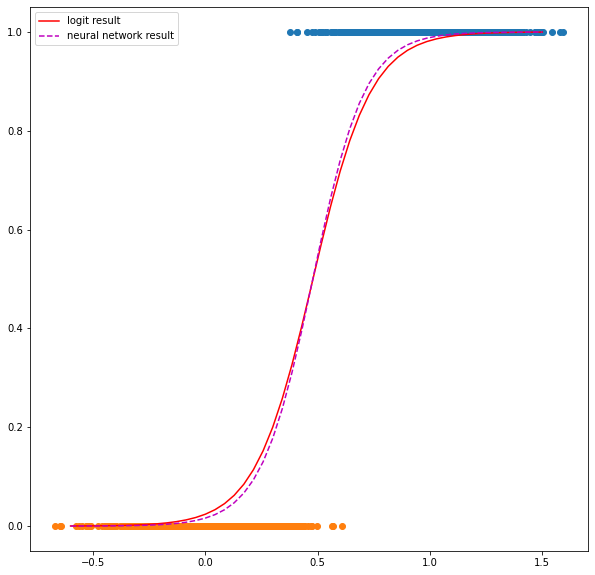

In [77]:
plt.figure(figsize = [10,10])
fast_scatter_plot()

lr_line, = plt.plot(new_X, new_Y, color = 'r')
nn_line, = plt.plot(new_X, new_Y_nn, color = 'm', linestyle = '--')

plt.legend([lr_line, nn_line],['logit result', 'neural network result'])

## Вывод:

Между предсказаниями модели есть некоторая разница, видимо это обусловлено, различными алгоритмами оценки параметров, но должно быть формула одна и таже:

$$ f(z) = \frac{1}{1+e^{-z}} $$

Получается что если я сознам перед слоем содеражащим сигмойд функцию слой с активирующей функцией "RELU" получиться как раз то о чем шла речь после экзамена по Математической экономике:

$$ f(d(x)) = \frac{1}{1+e^{-d(x)}} $$

где $d(x) =  \begin{cases}
   x ; x \geq 0\\
   0 ;x < 0
 \end{cases}$ - "RELU" функция.
